# Практическая работа №3: Регрессионный анализ
Выполнила студентка гр. 1374 Черкасова Дарья. Вариант №25

## Цель работы
Ознакомление с основными положениями метода наименьших квадратов (МНК), со статистическими свойствами МНК-оценок, с понятием функции регрессии и роли МНК в регрессионном анализе.

## Основные теоретические положения

Регрессионная модель: $ E(Y|z)=f_ϴ(z) $

Линейная регрессионная модель: $ E_ϴ(Y|z)=x(z)^\intercalβ $

z-ковариата

x(z) - вектор регрессоров

$ β $ - вектор параметров

Линейная регрессия У по  Х: $У =\beta_0  + \beta_1x_1 + ⋯ + \beta_nx_n + 𝜀$

 МНК (Метод Наименьших Квадратов)

$RSS(\beta)=\left\| Y-X^\intercal\beta \right\|^2=(Y-X^\intercal\beta)^\intercal(Y-X^\intercal\beta)\to min $(по $ \beta)$

Нормальные уравнения: $XX^\intercal\beta=XY$


Решение системы нормальных уравнений в регулярном случае: $\hat{\beta}=(XX^\intercal)^{-1}XY$

 Несмещённая оценка дисперсии $s^{2}$

$S^{2} =\frac{SS_e}{n-r} =\frac{RSS(\hat{\beta})}{n-r}$

 r-ранг матрицы X

ДНО функции:$\psi=C^\intercal\beta$

Доверительное оценивание

Классическое предположение: $ Y \sim N(X^\intercalβ,σ^2E) $

Эквивалентное предположение об остатках:  $ ε \sim N(0,σ^2E) $

Доверительный эллипс уровня доверия $1- α$ для $ (β_0,β_1) $

Проверка гипотез

$ H_0:Ψ=0 $

$ F-статистика: F=\frac{SS_H/q}{SS_e/(n-r)} $

$ SS_H=RSS(\hat{\beta_H})-RSS(\hat{\beta}) $

$ \hat{\beta_H}$ - МНК при условии  $Ψ=0$

F-статистика при $ H_0 \sim F_{q,n-r} $, где - $ F_{q,n-r} $ распределение Фишера Снедекора с q и (n-r) степенями свободы

$ x_α: F_{q,n-r}(x_α)=1-α $


## Постановка задачи
Результаты статистического эксперимента представлены в виде двух переменных. Требуется оценить характер (случайной) зависимости переменной Y от переменной X. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы


1.Рез-ты эксп-та графически

,vec_x,vec_y
,<dbl>,<dbl>
1,5,6.25
2,6,2.16
3,4,7.81
4,5,8.08
5,4,19.97
6,3,9.74


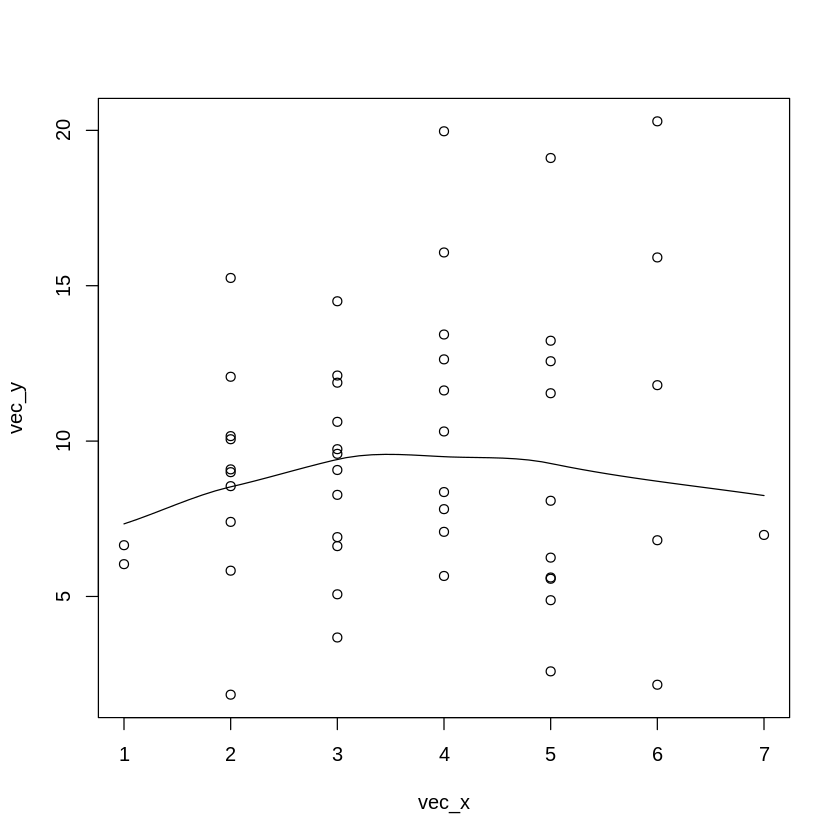

In [20]:
vec_x=c(5,6,4,5,4,3,4,5,4,5,3,4,3,2,2,4,5,2,1,4,3,3,3,5,4,1,6,2,5,6,3,5,3,2,3,7,2,2,3,5,2,6,2,6,5,3,2,4,3,4)
vec_y=c(6.25,2.16,7.81,8.08,19.97,9.74,7.08,13.23,16.07,4.88,6.62,5.66,6.91,7.4,9.09,12.63,2.59,9.0,6.65,13.43,8.27,14.5,11.88,5.57,11.63,6.04,20.29,15.25,11.54,6.81,9.59,19.11,5.07,10.16,3.68,6.98,10.06,1.84,12.11,12.57,5.83,11.8,12.07,15.91,5.61,10.62,8.55,8.36,9.07,10.31)
df=data.frame(vec_x,vec_y)
head(df)
scatter.smooth(vec_x, vec_y) # диаграммa рассеяния , чтобы просмотреть взаимосвязь между двумя переменными

Линейная регрессионная модель переменной У по переменной Х

$ Y=β_0+β_1X+ε $

$ E_ϴ(ε)=0 $

$ Y=\begin{pmatrix} 1 & x \end{pmatrix} \begin{pmatrix} β_0 \\ β_1 \end{pmatrix}+ε$

МНК оценки параметров сдвига и масштаба

$ RSS(β)=||Y-X^{\intercal}β||^2 → min $

Нормальные уравнения

$ XX^{\intercal}β=XY $

$ \hat{β}=(XX^{\intercal})^{-1}XY $



In [21]:
one=rep(1, 50)
x=rbind(one,vec_x)
x

one,1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,1
vec_x,5,6,4,5,4,3,4,5,4,5,⋯,2,6,2,6,5,3,2,4,3,4


In [22]:
xx=x %*% t(x)
det(xx)

[1] 5225

Определитель матрицы не равен нулю, следовательно можно найти обратную матрицу.

In [23]:
xx_1=solve(xx)
xx_1

,one,vec_x
one,0.1510048,-0.035406699
vec_x,-0.0354067,0.009569378


In [24]:
beta=xx_1 %*% x
beta=beta %*% matrix(vec_y)
beta


one,8.0190182
vec_x,0.4074545


МНК оценки: $ β_0=8.01902, β_1=0.40746 $

Проверим через встроенную функцию:

In [25]:
model = lm(vec_y ~ vec_x, data=df)

summary(model)


Call:
lm(formula = vec_y ~ vec_x, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.3037 -2.9083 -0.0027  2.6074 10.3212 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   8.0190     1.6830   4.765 1.79e-05 ***
vec_x         0.4075     0.4237   0.962    0.341    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.331 on 48 degrees of freedom
Multiple R-squared:  0.01891,	Adjusted R-squared:  -0.001534 
F-statistic: 0.9249 on 1 and 48 DF,  p-value: 0.341


Y=8.0190+0.4075X+ε




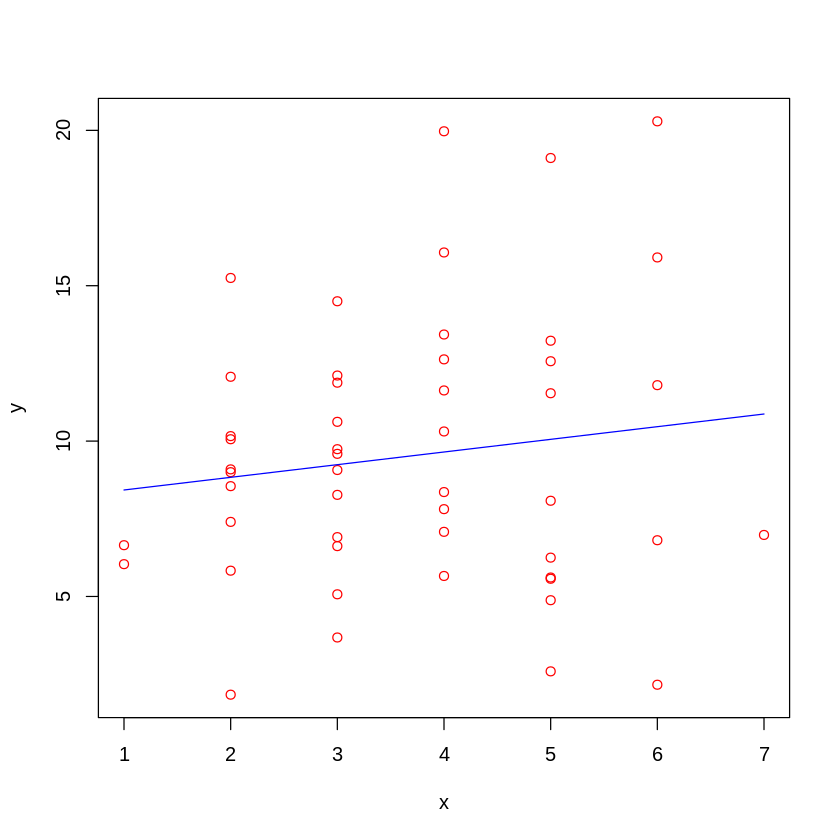

In [26]:
plot(vec_x, vec_y, col='red', xlab='x', ylab='y')

x_s=seq(min(vec_x), max(vec_x), by=0.2)
#add second line to plot
lines(x_s, 8.0190+0.4075*x_s, col='blue')

По графику видно наличие сильных выбросов. Соответствие оценки и полученных данных не очень успешное.

2.Несмещенная оценка дисперсии

$ s^2=\frac{RSS(β)}{n-r} $

In [27]:
library(Matrix)
r=rankMatrix(x)
n=50
rss=t(matrix(vec_y)-(t(x) %*% beta)) %*% (matrix(vec_y)-(t(x) %*% beta))
s2=rss/(n-r)
s2
mse=s2^0.5
mse

18.75704


4.33094


$ s^2=18.757 $

MSE=4.331

Гистограмма ошибок с шагом 2.1

List of 6
 $ breaks  : num [1:12] -10 -8 -6 -4 -2 0 2 4 6 8 ...
 $ counts  : int [1:11] 1 2 5 9 8 11 7 2 2 2 ...
 $ density : num [1:11] 0.01 0.02 0.05 0.09 0.08 0.11 0.07 0.02 0.02 0.02 ...
 $ mids    : num [1:11] -9 -7 -5 -3 -1 1 3 5 7 9 ...
 $ xname   : chr "mistakes"
 $ equidist: logi TRUE
 - attr(*, "class")= chr "histogram"


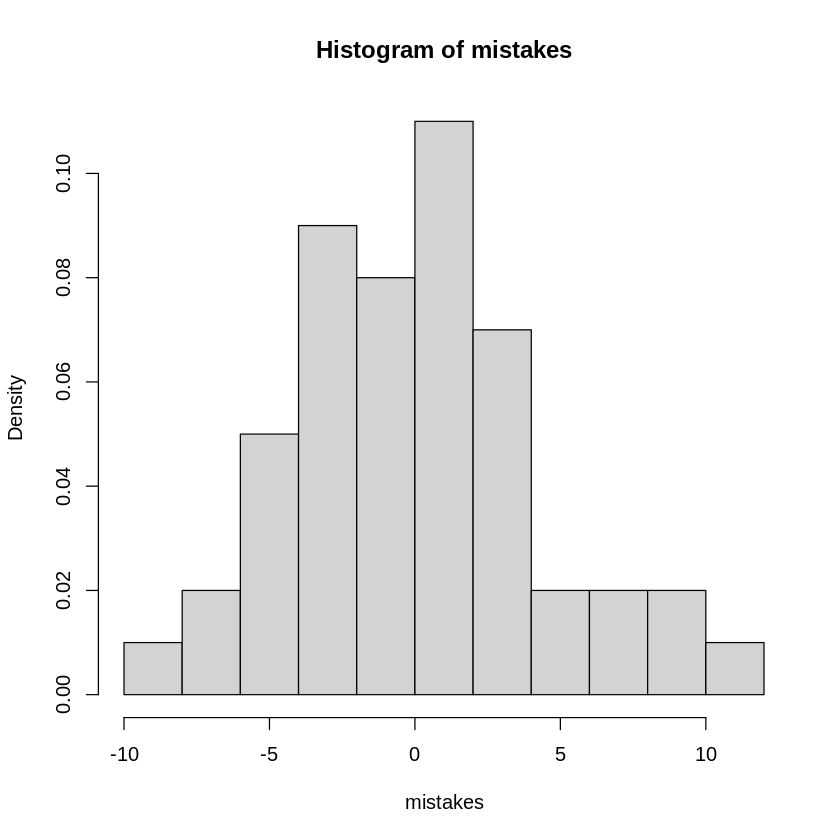

In [28]:
mistakes=matrix(vec_y)-(t(x) %*% beta)
h=2.1
count=(max(mistakes)-min(mistakes))/h
library(lattice)
hist= hist(mistakes, breaks=count,freq=FALSE)
str(hist)

Проверка гипотезы нормальности через хи-квадрат с $ α=0.2 $

$ H_0: ε ∼ N(0,\sigma^2E) $

$ H_A: ε \nsim  N(0,\sigma^2E) $

Разобъем множество всех возможных значений СВ на интервалы



In [29]:
xi=sort(mistakes)
xi
sum(xi >= -10 & xi < -4)
sum(xi >= -4 & xi < -2)
sum(xi >= -2 & xi < 0)
sum(xi >= 0 & xi < 2)
sum(xi >= 2 & xi < 4)
sum(xi >= 4 )

[1] -8.3037455 -7.4662909 -6.9939273 -5.5613818 -5.1762909 -4.4862909
 [7] -4.4462909 -4.1713818 -3.9888364 -3.8912000 -3.8062909 -3.6537455
[13] -3.0039273 -2.6213818 -2.5688364 -2.3864727 -2.3313818 -1.9762909
[19] -1.8388364 -1.7764727 -1.4339273 -1.2888364 -0.9713818 -0.2839273
[25] -0.1713818  0.1660727  0.2560727  0.3486182  0.4986182  0.6611636
[31]  1.2260727  1.3260727  1.3362545  1.3786182  1.4837091  1.9811636
[37]  2.5137091  2.6386182  2.8686182  2.9811636  3.1737091  3.2360727
[43]  3.7811636  5.2586182  5.4462545  6.4160727  6.4211636  9.0537091
[49]  9.8262545 10.3211636

[1] 8

[1] 9

[1] 8

[1] 11

[1] 7

[1] 7

$\Delta_0 = [-10,-4), \Delta_1 = [-4,-2), \Delta_2 = [-2,0), \Delta_3 =[0,2),\Delta_4 =[2,4),   \Delta_5=[4, + \infty)$

Найдём верoятности попадания СВ в построенные интервалы.




$p_0 = 0,16738, p_1 = 0.14426, p_2 = 0.17788, p_3 =  0.17788, p_4 =   0.14426, p_5 =  0,18834$

$\sum \limits_{i=0}^6 p_i = 1$

$\;\;\;\;$ $\Delta_0$, $\Delta_1$, $\Delta_2$, $\Delta_3$, $\Delta_4$, $\Delta_5$

$i$ $\;\;$ $ 0, $ $\;\;1,$   $\;\;\;2,$  $\;3,$ $\;4,$ $\;5$

$n_i$ $\;8, 9, 8, 11,7,7\;$

$p_i$ $0,16738,  0.14426,  0.17788,   0.17788,   0.14426,  0,18834$

$np_i$ $8.369, 7.213, 8.894, 8.894, 7.213, 9.417$

$\frac{(n_i - np_i)^2}{np_i}$ $ 0.0163, 0.443, 0.09, 0.5, 0.006, 0.62  $

$\chi^2_в = \sum \frac{(n_i - np_i)^2}{np_i} = 1.6753$

где

$np_i$ ожидаемые частоты попадания в интервал.

$\alpha = 0.2$

Найдём квантиль распределения $\chi^2_{1 - \alpha, r - 1}$, где

$r$ - кол-во интервалов.


In [30]:
print(qchisq(p = 0.8, df = 5))

[1] 7.289276



$\chi^2_{1 - 0.2, 6 - 1} =  7.289276$

$\chi^2_в < \chi^2_{0.9, 3}  \Rightarrow H_0$  не отвергается.

Оценим расстояние полученной оценки до класса норм.распр. по Колмогорову

In [31]:
ks.test(mistakes, "pnorm")


	Exact one-sample Kolmogorov-Smirnov test

data:  mistakes
D = 0.36217, p-value = 2.208e-06
alternative hypothesis: two-sided


Поскольку p-value = 2.208e-06 сильно меньше уровня значимости 0.2, то гипотезу отвергаем.


List of 6
 $ breaks  : num [1:12] -10 -8 -6 -4 -2 0 2 4 6 8 ...
 $ counts  : int [1:11] 1 2 5 9 8 11 7 2 2 2 ...
 $ density : num [1:11] 0.01 0.02 0.05 0.09 0.08 0.11 0.07 0.02 0.02 0.02 ...
 $ mids    : num [1:11] -9 -7 -5 -3 -1 1 3 5 7 9 ...
 $ xname   : chr "mistakes"
 $ equidist: logi TRUE
 - attr(*, "class")= chr "histogram"


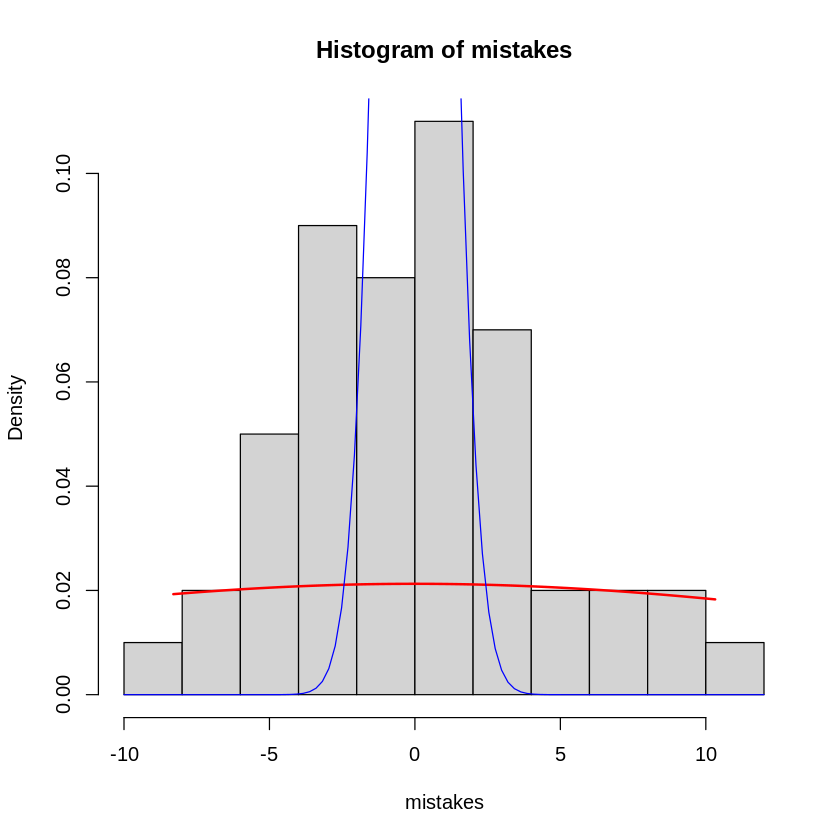

In [32]:
h=2.1
count=(max(mistakes)-min(mistakes))/h
library(lattice)
hist= hist(mistakes, breaks=count,freq=FALSE)
X=seq(min(mistakes), max(mistakes), length = 100)
f = dnorm(X, mean = 0, sd = s2)
lines(X, f, col = "red", lwd = 2)

str(hist)
curve(dnorm, add = T,col='blue'  )

3.ДИ для $\beta_0$:

ДНО-функция: $\psi(β) = C^\intercal \beta $

$C = (1, 0)^\intercal$

НРМД оценка $\hat{\psi} = \sum_{j=1}^m c_j\hat{\beta}_j=\hat{β_0}$

ДИ: $\psi \in \left[\hat{\psi} - x_\alpha S \sqrt{b}; \hat{\psi} + x_\alpha S \sqrt{b}\right] $,

$x_\alpha: S_{n-r}(x_\alpha) = 1 - \frac{\alpha}{2}$

$b = C^\intercal(XX^\intercal)^{-1}C$

In [33]:
x_a=qt(0.9,df=n-r)
x_a
C=c(1,0)
C=matrix(C)
b=t(matrix(C)) %*% xx_1 %*% C
left=beta[1]-x_a*mse*sqrt(b)
right=beta[1]+x_a*mse*sqrt(b)
left
right

[1] 1.299439

5.832096


10.20594


$ β_0 \in [5.832096,10.20594] $

ДИ для $\beta_1$:

ДНО-функция: $\psi(β) = C^\intercal \beta $

$C = (0, 1)^\intercal$

НРМД оценка $\hat{\psi} = \sum_{j=1}^m c_j\hat{\beta}_j=\hat{β_1}$

ДИ: $\psi \in \left[\hat{\psi} - x_\alpha S \sqrt{b}; \hat{\psi} + x_\alpha S \sqrt{b}\right] $,

$x_\alpha: S_{n-r}(x_\alpha) = 1 - \frac{\alpha}{2}$

$b = C^\intercal(XX^\intercal)^{-1}C$

In [34]:
C_2=c(0,1)
C_2=matrix(C_2)
b_2=t(matrix(C_2)) %*% xx_1 %*% C_2
left_2=beta[2]-x_a*mse*sqrt(b_2)
right_2=beta[2]+x_a*mse*sqrt(b_2)
left_2
right_2

-0.1430741


0.9579832


$ β_1 \in [-0.1430741,0.9579832] $

Доверительный эллипс уровня доверия $1- α$ для $ (β_0,β_1) $

$ A_α =\{ \vec{x}: (\vec{x}-\hat{\psi})^\intercal B^{-1}(\vec{x}-\hat{\psi}) \leq qs^2x_α\}$


$x_\alpha: F_{q,n-r}(x_\alpha) = 1 - α$

$ B= C^\intercal(XX^\intercal)^{-1}C $

q - размер вектора $\psi$, т.е. q=2

$ C=\begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} $

$\hat{\psi} = C^\intercal \beta=(β_0,β_1)$



In [35]:
C=diag(2)
B=t(C) %*% xx_1 %*% C
B
B=solve(B)
B

0.1510048,-0.035406699
-0.0354067,0.009569378


50,185
185,789


In [36]:
beta
qf(0.8,2,48)

one,8.0190182
vec_x,0.4074545


[1] 1.664629

$ \left(\begin{pmatrix} x \\ y  \end{pmatrix}-\begin{pmatrix} β_0 \\ β_1  \end{pmatrix}\right)^\intercal B^{-1}\left(\begin{pmatrix} x \\ y  \end{pmatrix}-\begin{pmatrix} β_0 \\ β_1  \end{pmatrix}\right) \leq qs^2x_α $

$ \left(\begin{pmatrix} x \\ y  \end{pmatrix}-\begin{pmatrix} 8.019 \\ 0.40745  \end{pmatrix}\right)^\intercal \begin{pmatrix} 50 & 185 \\ 185 & 789  \end{pmatrix}\left(\begin{pmatrix} x \\ y  \end{pmatrix}-\begin{pmatrix} 8.019 \\ 0.40745  \end{pmatrix}\right) \leq 2 \cdot 18.757 \cdot 1.66 $

$ \begin{pmatrix} x-8.019 & y-0.40745   \end{pmatrix}  \begin{pmatrix} 50 & 185 \\ 185 & 789  \end{pmatrix}\begin{pmatrix} x-8.019 \\ y-0.40745   \end{pmatrix} \leq 62.273 $

$50x^2-952,6565x+4555,12+370xy-3609,9861y+789y^2 \leq 62.273 $

Приведем уравнение (неравенство) эллипса к каноническому виду методом инвариантов.


 $50x^2-952,6565x+4555,12+370xy-3609,9861y+789y^2 = 62.273 $


 $50x^2-952,6565x+4492,847+370xy-3609,9861y+789y^2 = 0 $

  $Аx^2+2Dx+F+2Bxy+2Ey+Cy^2 = 0 $

  $ A=50,B=185,C=789, D=-476.32825, E=-1804.993, F=4492,847 $

  Инварианты:

  $ S=A+C=839 $

  $δ=det\begin{pmatrix} A & B \\ B & C   \end{pmatrix}  = det B^{-1} $

  $ Δ=det\begin{pmatrix} A & B & D \\ B & C & E \\ D & E & F  \end{pmatrix} $

  Поскольку инварианты не зависят от коэффициентов того или иного уравнения, то справедливо:
  $ S=A+C=A_1+C_1 $

  $δ=det\begin{pmatrix} A & B \\ B & C   \end{pmatrix}  = det\begin{pmatrix} A_1 & B_1 \\ B_1 & C_1   \end{pmatrix}=det\begin{pmatrix} A_1 & 0 \\ 0 & C_1   \end{pmatrix} = A_1C_1 $

  $ Δ=det\begin{pmatrix} A & B & D \\ B & C & E \\ D & E & F  \end{pmatrix}=det\begin{pmatrix} A_1 & B_1 & D_1 \\ B_1 & C_1 & E_1 \\ D_1 & E_1 & F_1  \end{pmatrix}=det\begin{pmatrix} A_1 & 0 & 0 \\ 0 & C_1 & 0 \\ 0 & 0 & F_1  \end{pmatrix}=A_1C_1F_1 $

  Находим инварианты:

 $ S=A+C=839 $

  $δ=det B^{-1} $



In [37]:

det(B)

[1] 5225

 $δ=det B^{-1}=5225 $

In [38]:
A=50
B_=185
C_=789
D=-476.32825
E=-1804.993
F_=4492.847
m1=c(A,B_,D)
m2=c(B_,C_,E)
m3=c(D,E,F_)
M=rbind(m1,m2,m3)
det(M)

[1] -325379.6

 $ Δ=-325379.634$

 Решаем систему

 $ \begin{equation}
\left\{
\begin{array}{ll}
A_1+C_1=S\\
A_1C_1=δ\\
A_1C_1F_1=Δ
\end{array}\right.
\end{equation} $

 $ \begin{equation}
\left\{
\begin{array}{ll}
A_1+C_1=839\\
A_1C_1=5225\\
A_1C_1F_1=-325379.634=-62.2736 \cdot 5225
\end{array}\right.
\end{equation} $

$ F_1= -62.2736$

$A_1=S-C_1=839-C_1 $

$ (839-C_1)C1=5225 $

$ C_1^2-839C_1+5225=0 $

$ C_1=6.27458 $ или $ C_1=832.72542 $

$ А_1=839-6.27458=832.72542 $ или $ А_1=839-832.72542=6.27458 $

Так как в каноническом уравнении эллипса a>b, то выбираем решение

 $ А_1=6.27458, C_1=832.72542,  F_1= -62.2736 $

Уравнение линии принимает вид

$ A_1\widetilde{x}^2+C_1\widetilde{y}^2+F_1=0 $

$ 6.27458\widetilde{x}^2+832.72542\widetilde{y}^2-62.2736=0 $

Координаты нового начала координат отыскиваются из СЛУ:

$  \begin{equation}
\left\{
\begin{array}{ll}
Ax_0+By_0+D=0\\
Bx_0+Cy_0+E=0
\end{array}\right.
\end{equation}  $

$  \begin{equation}
\left\{
\begin{array}{ll}
50x_0+185y_0-476.32825=0\\
185x_0+789y_0-1804.993=0
\end{array}\right.
\end{equation}  $

$ x_0=8,019; y_0=0,40745 $

Угол поворота новой системы координат отыскивается:

$ tg(α_0)=\frac{A_1-A}{B} $

$  tg(α_0)=\frac{6.27458-50}{185} $

$ α_0=-0,232094+\pi k $

Приводим к каноническому виду:

$ 6.27458\widetilde{x}^2+832.72542\widetilde{y}^2=62.2736 $

$ \frac{6.27458\widetilde{x}^2}{62.2736}+\frac{832.72542\widetilde{y}^2}{62.2736}=1 $

$ \frac{\widetilde{x}^2}{9,92474}+\frac{\widetilde{y}^2}{0,074783}=1 $


In [39]:
print("Полуоси: a=")
 sqrt(9.92474)
 print("b=")
sqrt(0.074783)

[1] "Полуоси: a="


[1] 3.150356

[1] "b="


[1] 0.2734648

4. Гипотеза $ \psi = 0 $, то есть $ β_1=0 $

In [40]:
beta_4=beta
beta_4[2]=0
beta_4
rss_4=t(matrix(vec_y)-(t(x) %*% beta_4)) %*% (matrix(vec_y)-(t(x) %*% beta_4))
ssn=rss_4-rss
q=length(beta_4)
f_stat=(ssn/q)/(rss/(n-r))
f_stat
qf(0.8,2,48)
pv=1-pf(f_stat,2,48)
pv

one,8.019018
vec_x,0.000000


3.491732


[1] 1.664629

0.0383901


F-статистика = 3.49

$ x_α=1.665 $

$F > x_{\alpha_2}$ следовательно гипотеза о независимости отвергается

5. $ Y=β_0+β_1X+\beta_2X^2+ε $

$ E_ϴ(ε)=0 $

$ Y=\begin{pmatrix} 1 & x & x^2\end{pmatrix} \begin{pmatrix} β_0 \\ β_1 \\β_2 \end{pmatrix}$

МНК оценки параметров сдвига и масштаба

$ RSS(β)=||Y-X^{\intercal}β||^2 → min $

Нормальные уравнения

$ XX^{\intercal}β=XY $

$ \hat{β}=(XX^{\intercal})^{-1}XY $

In [41]:
x2=vec_x^2
x=rbind(x,x2)
x

one,1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,1
vec_x,5,6,4,5,4,3,4,5,4,5,⋯,2,6,2,6,5,3,2,4,3,4
x2,25,36,16,25,16,9,16,25,16,25,⋯,4,36,4,36,25,9,4,16,9,16


In [42]:
xx2=x %*% t(x)
det(xx2)

[1] 1331176

Определитель матрицы не равен нулю, следовательно можно найти обратную матрицу.

In [43]:
xx_2=solve(xx2)
xx_2

,one,vec_x,x2
one,0.76771516,-0.41191698,0.049200106
vec_x,-0.41191698,0.23943415,-0.030037350
x2,0.04920011,-0.03003735,0.003925101


In [44]:
beta_2=xx_2 %*% x
beta_2=beta_2 %*% matrix(vec_y)
beta_2

one,4.859938
vec_x,2.336117
x2,-0.252026


МНК оценки: $ β_0=4.859938, β_1=2.336117, β_2=-0.252026 $
$ Y=4.859938+2.336117X-0.252026X^2+ε $

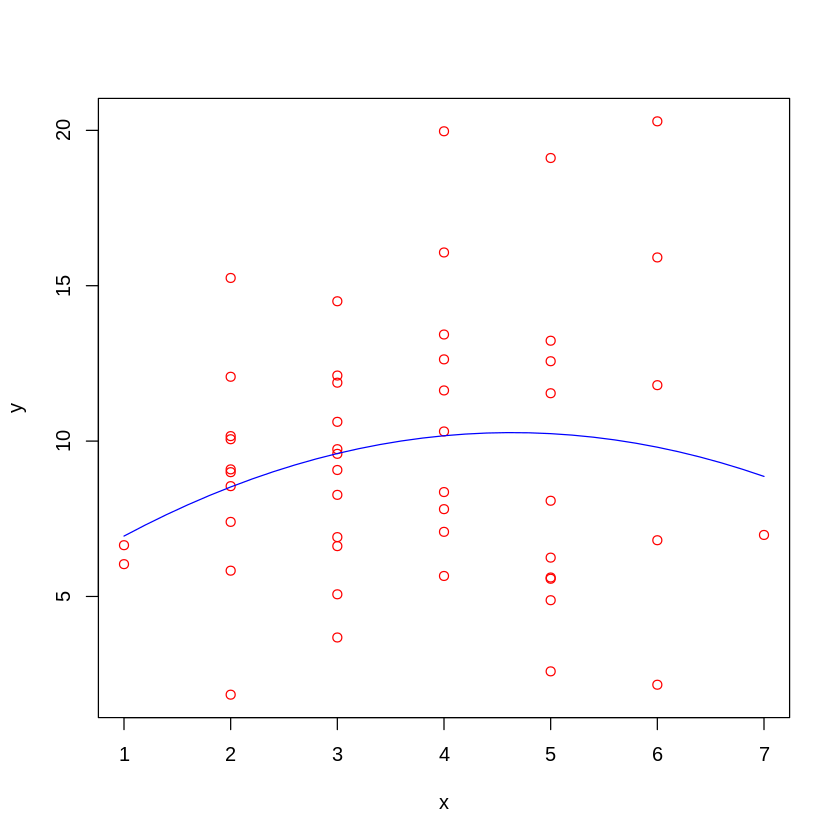

In [45]:
plot(vec_x, vec_y, col='red', xlab='x', ylab='y')
x_sort=seq(min(vec_x), max(vec_x), by=0.2)
#add second line to plot
lines(x_sort, 4.859938+2.336117*x_sort - 0.252026*(x_sort^2), col='blue')

6.Несмещенная оценка дисперсии

$ s^2=\frac{RSS(β)}{n-r} $

In [46]:
library(Matrix)
r=rankMatrix(x)
n=50
rss=t(matrix(vec_y)-(t(x) %*% beta_2)) %*% (matrix(vec_y)-(t(x) %*% beta_2))
s2=rss/(n-r)
s2
mse=s2^0.5
mse

18.81183


4.33726


$ s^2=18.81183 $

MSE=4.33726

Гистограмма ошибок с шагом 2.1

List of 6
 $ breaks  : num [1:11] -8 -6 -4 -2 0 2 4 6 8 10 ...
 $ counts  : int [1:10] 3 6 8 8 11 7 2 2 2 1
 $ density : num [1:10] 0.03 0.06 0.08 0.08 0.11 0.07 0.02 0.02 0.02 0.01
 $ mids    : num [1:10] -7 -5 -3 -1 1 3 5 7 9 11
 $ xname   : chr "mistakes"
 $ equidist: logi TRUE
 - attr(*, "class")= chr "histogram"


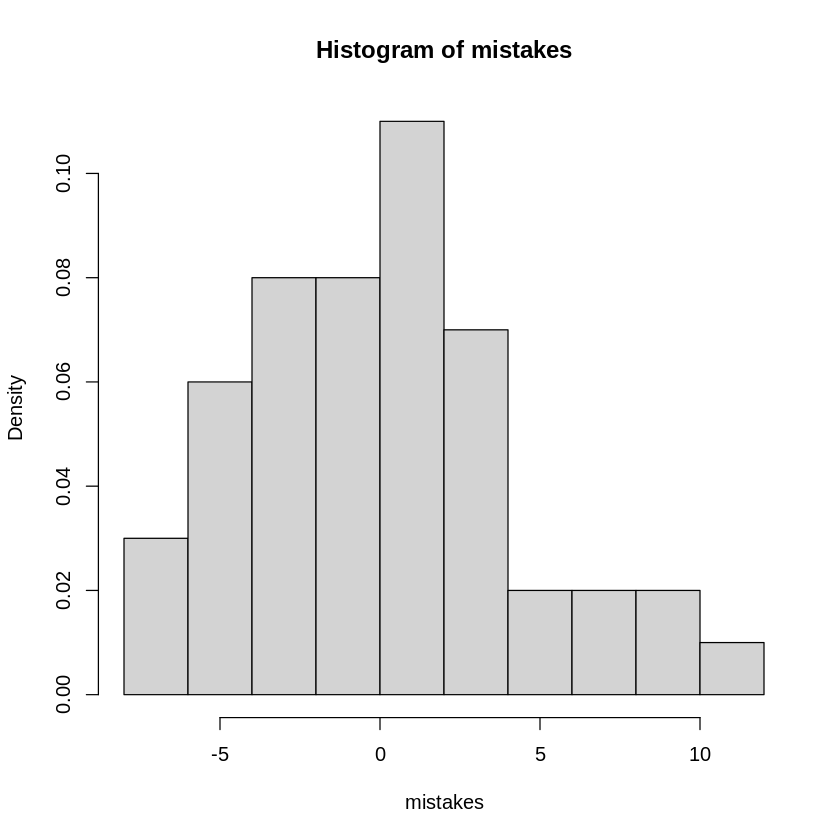

In [63]:
mistakes=matrix(vec_y)-(t(x) %*% beta_2)
h=2.1
count=(max(mistakes)-min(mistakes))/h
library(lattice)
hist= hist(mistakes, breaks=count,freq=FALSE)
str(hist)

Проверка гипотезы нормальности через хи-квадрат с $ α=0.2 $

$ H_0: ε ∼ N(0,\sigma^2E) $

$ H_A: ε \nsim  N(0,\sigma^2E) $

Разобъем множество всех возможных значений СВ на интервалы


In [48]:
xi=sort(mistakes)
xi
sum(xi >= -10 & xi < -4)
sum(xi >= -4 & xi < -2)
sum(xi >= -2 & xi < 0)
sum(xi >= 0 & xi < 2)
sum(xi >= 2 & xi < 4)
sum(xi >= 4 )

[1] -7.64987196 -7.64370259 -6.68406792 -5.92005463 -5.35987196 -4.66987196
 [7] -4.62987196 -4.53005463 -4.51198931 -3.98987196 -3.09198931 -2.99370259
[13] -2.98005463 -2.69406792 -2.69005463 -2.36198931 -2.15987196 -1.88348119
[19] -1.81198931 -1.33005463 -1.12406792 -0.90402919 -0.53005463 -0.29402919
[25] -0.01005463  0.02593208  0.13801069  0.13994537  0.47593208  0.56593208
[31]  1.01994537  1.30012804  1.45801069  1.53593208  1.63593208  1.99629741
[37]  2.27994537  2.33012804  2.45801069  2.50994537  2.99012804  3.25801069
[43]  3.54593208  4.89994537  5.89801069  6.10629741  6.72593208  8.87012804
[49]  9.79801069 10.48629741

[1] 9

[1] 8

[1] 8

[1] 11

[1] 7

[1] 7

$\Delta_0 = [-10,-4), \Delta_1 = [-4,-2), \Delta_2 = [-2,0), \Delta_3 =[0,2),\Delta_4 =[2,4),   \Delta_5=[4, + \infty)$

Найдём верoятности попадания СВ в построенные интервалы.

$p_0 = 0,16738, p_1 = 0.14426, p_2 = 0.17788, p_3 =  0.17788, p_4 =   0.14426, p_5 =  0,18834$

$\sum \limits_{i=0}^6 p_i = 1$

$\;\;\;\;$ $\Delta_0$, $\Delta_1$, $\Delta_2$, $\Delta_3$, $\Delta_4$, $\Delta_5$

$i$ $\;\;$ $ 0, $ $\;\;1,$   $\;\;\;2,$  $\;3,$ $\;4,$ $\;5$

$n_i$ $\;9, 8, 8, 11,7,7\;$

$p_i$ $0,16738,  0.14426,  0.17788,   0.17788,   0.14426,  0,18834$

$np_i$ $8.369, 7.213, 8.894, 8.894, 7.213, 9.417$

$\frac{(n_i - np_i)^2}{np_i}$ $ 0.0476, 0.086, 0.09, 0.5, 0.006, 0.62  $

$\chi^2_в = \sum \frac{(n_i - np_i)^2}{np_i} = 1.3496$

где

$np_i$ ожидаемые частоты попадания в интервал.

$\alpha = 0.2$

Найдём квантиль распределения $\chi^2_{1 - \alpha, r - 1}$, где

$r$ - кол-во интервалов.


$\chi^2_{1 - 0.2, 6 - 1} =  7.289276$

$\chi^2_в < \chi^2_{0.9, 3}  \Rightarrow H_0$  не отвергается.

Оценим расстояние полученной оценки до класса норм.распр. по Колмогорову

In [49]:
ks.test(mistakes, "pnorm")


	Exact one-sample Kolmogorov-Smirnov test

data:  mistakes
D = 0.34501, p-value = 8.066e-06
alternative hypothesis: two-sided


Поскольку p-value = 8.066e-06 сильно меньше уровня значимости 0.2, то гипотезу отвергаем.

List of 6
 $ breaks  : num [1:11] -8 -6 -4 -2 0 2 4 6 8 10 ...
 $ counts  : int [1:10] 3 6 8 8 11 7 2 2 2 1
 $ density : num [1:10] 0.03 0.06 0.08 0.08 0.11 0.07 0.02 0.02 0.02 0.01
 $ mids    : num [1:10] -7 -5 -3 -1 1 3 5 7 9 11
 $ xname   : chr "mistakes"
 $ equidist: logi TRUE
 - attr(*, "class")= chr "histogram"


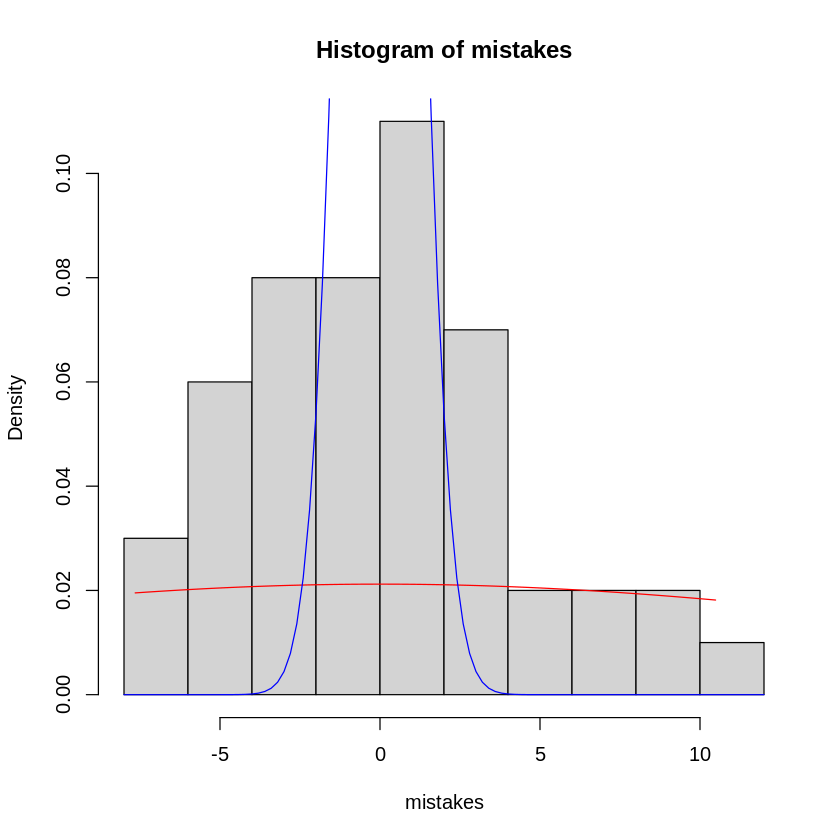

In [64]:
h=2.1
count=(max(mistakes)-min(mistakes))/h
library(lattice)
hist= hist(mistakes, breaks=count,freq=FALSE)
X=seq(min(mistakes), max(mistakes), length = 100)
f = dnorm(X, mean = 0, sd = s2)
lines(X, f, col = "red")

str(hist)
curve(dnorm, add = T,col='blue'  )


7.ДИ для $\beta_0$:

ДНО-функция: $\psi(β) = C^\intercal \beta $

$C = (1, 0,0)^\intercal$

НРМД оценка $\hat{\psi} = \sum_{j=1}^m c_j\hat{\beta}_j=\hat{β_0}$

ДИ: $\psi \in \left[\hat{\psi} - x_\alpha S \sqrt{b}; \hat{\psi} + x_\alpha S \sqrt{b}\right] $,

$x_\alpha: S_{n-r}(x_\alpha) = 1 - \frac{\alpha}{2}$

$b = C^\intercal(XX^\intercal)^{-1}C$

In [51]:
x_a=qt(0.9,df=n-r)
x_a
C=c(1,0,0)
C=matrix(C)
b=t(matrix(C)) %*% xx_2 %*% C
left=beta_2[1]-x_a*mse*sqrt(b)
right=beta_2[1]+x_a*mse*sqrt(b)
left
right

[1] 1.299825

-0.07975965


9.799637


$ β_0 \in [-0.07975965,9.799637] $

ДИ для $\beta_1$:

ДНО-функция: $\psi(β) = C^\intercal \beta $

$C = (0, 1,0)^\intercal$

НРМД оценка $\hat{\psi} = \sum_{j=1}^m c_j\hat{\beta}_j=\hat{β_1}$

ДИ: $\psi \in \left[\hat{\psi} - x_\alpha S \sqrt{b}; \hat{\psi} + x_\alpha S \sqrt{b}\right] $,

$x_\alpha: S_{n-r}(x_\alpha) = 1 - \frac{\alpha}{2}$

$b = C^\intercal(XX^\intercal)^{-1}C$

In [52]:
x_a=qt(0.9,df=n-r)
x_a
C=c(0,1,0)
C=matrix(C)
b=t(matrix(C)) %*% xx_2 %*% C
left=beta_2[2]-x_a*mse*sqrt(b)
right=beta_2[2]+x_a*mse*sqrt(b)
left
right

[1] 1.299825

-0.4225129


5.094746


$ β_1 \in [-0.4225129,5.094746] $

ДИ для $\beta_2$:

ДНО-функция: $\psi(β) = C^\intercal \beta $

$C = (0, 0,1)^\intercal$

НРМД оценка $\hat{\psi} = \sum_{j=1}^m c_j\hat{\beta}_j=\hat{β_2}$

ДИ: $\psi \in \left[\hat{\psi} - x_\alpha S \sqrt{b}; \hat{\psi} + x_\alpha S \sqrt{b}\right] $,

$x_\alpha: S_{n-r}(x_\alpha) = 1 - \frac{\alpha}{2}$

$b = C^\intercal(XX^\intercal)^{-1}C$

In [53]:
x_a=qt(0.9,df=n-r)
x_a
C=c(0,0,1)
C=matrix(C)
b=t(matrix(C)) %*% xx_2 %*% C
left=beta_2[3]-x_a*mse*sqrt(b)
right=beta_2[3]+x_a*mse*sqrt(b)
left
right

[1] 1.299825

-0.6052301


0.1011781


$ β_2 \in [-0.6052301,0.1011781] $

Доверительный эллипсоид уровня доверия $1- α$ для $ (β_0,β_1) $

$ A_α =\{ \vec{x}: (\vec{x}-\hat{\psi})^\intercal B^{-1}(\vec{x}-\hat{\psi}) \leq qs^2x_α\}$


$x_\alpha: F_{q,n-r}(x_\alpha) = 1 - α$

$ B= C^\intercal(XX^\intercal)^{-1}C $

q - размер вектора $\psi$, т.е. q=3

$ C=\begin{pmatrix} 1 & 0&0 \\ 0 & 1&0 \\0&0&1 \end{pmatrix} $

$\hat{\psi} = C^\intercal \beta=(β_0,β_1,β_2)$


In [54]:
C=diag(3)
B=t(C) %*% xx_2 %*% C
B
B=solve(B)
B

0.76771516,-0.41191698,0.049200106
-0.41191698,0.23943415,-0.030037350
0.04920011,-0.03003735,0.003925101


50,185,789
185,789,3719
789,3719,18825


In [55]:
beta_2
qf(0.8,2,48)

one,4.859938
vec_x,2.336117
x2,-0.252026


[1] 1.664629

$ \left(\begin{pmatrix} x \\ y \\z \end{pmatrix}-\begin{pmatrix} β_0 \\ β_1  \\ β_2\end{pmatrix}\right)^\intercal B^{-1}\left(\begin{pmatrix} x \\ y \\z \end{pmatrix}-\begin{pmatrix} β_0 \\ β_1  \\ β_2\end{pmatrix}\right) \leq qs^2x_α $

$ \left(\begin{pmatrix} x \\ y \\z \end{pmatrix}-\begin{pmatrix} 4.859938 \\ 2.336117  \\ -0.252026\end{pmatrix}\right)^\intercal \begin{pmatrix} 50 & 185 &789 \\ 185&789&3719 \\ 789&3719&18825 \end{pmatrix}\left(\begin{pmatrix} x \\ y \\z \end{pmatrix}-\begin{pmatrix} 4.859938 \\ 2.336117  \\ -0.252026\end{pmatrix}\right)  \leq 3 \cdot 18.81183 \cdot 1.66 $

$ \begin{pmatrix} x-4.859938 \\ y-2.336117 \\z+0.252026 \end{pmatrix}^\intercal \begin{pmatrix} 50 & 185 &789 \\ 185&789&3719 \\ 789&3719&18825 \end{pmatrix} \begin{pmatrix} x-4.859938 \\ y-2.336117 \\z+0.252026 \end{pmatrix} \leq 93.683 $

In [56]:
s2


18.81183


In [57]:
cov=B
sch=eigen(cov)
sch



eigen() decomposition
$values
[1] 19595.317773    67.678461     1.003766

$vectors
            [,1]       [,2]        [,3]
[1,] -0.04140209 -0.4807357  0.87588757
[2,] -0.19422145 -0.8560448 -0.47902548
[3,] -0.98008362  0.1899488  0.05792715


In [58]:
sc=c(19595.317773,67.678461,1.003766)

In [59]:

pv=pf(0.8,3,47)
pv

[1] 0.4998756

In [60]:
osi=1/(sc/(pv*3*s2))
osi=osi^0.5
print("полуоси")
osi

Warning message in sc/(pv * 3 * s2):
“Recycling array of length 1 in vector-array arithmetic is deprecated.
  Use c() or as.vector() instead.
”


[1] "полуоси"


[1] 0.03794294 0.64562724 5.30140327

In [61]:
beta_2

one,4.859938
vec_x,2.336117
x2,-0.252026


Уравнение эллипсоида:

$ \frac{\widetilde{x}^2}{0.03794^2}+\frac{\widetilde{y}^2}{0.64563^2}+\frac{\widetilde{z}^2}{5.3014^2}=1  $

с центром в точке (4.859938, 2.336117, -0.252026)

8. Гипотеза $ \psi = 0 $, то есть $ β_2=0 $

In [62]:
beta_8=beta_2
beta_8[3]=0
rss_8=t(matrix(vec_y)-(t(x) %*% beta_8)) %*% (matrix(vec_y)-(t(x) %*% beta_8))
ssn=rss_8-rss
q=length(beta_8)
f_stat=(ssn/q)/(rss/(n-r))
f_stat
qf(0.8,3,47)
pv=1-pf(f_stat,3,47)
pv

21.1872


[1] 1.60852

7.954842e-09


F-статистика = 21.1872

$ x_α=1.608 $

$F > x_{\alpha_2}$ следовательно гипотеза о независимости отвергается

## Выводы

Ознакомились с основными положениями метода наименьших квадратов (МНК), со статистическими свойствами МНК-оценок, с понятием функции регрессии и роли МНК в регрессионном анализе.